In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Solution 1

In [2]:
fiscal_data = pd.read_csv("Sdf16_1a.txt", sep = "\t", low_memory = False)
fiscal_data.dropna(inplace = True) 

In [3]:
fiscal_data = fiscal_data.drop(fiscal_data[fiscal_data.TOTALREV <= 0].index)

In [4]:
fiscal_data

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
1,0100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,0100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,0100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,0100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
6,0100011,01503710100000,1,01073,142,13820,Leeds City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18697,5605762,51501900200000,56,56037,N,40540,Sweetwater County School District #2,Wyoming,WY,03,...,R,R,R,R,R,R,R,R,R,R
18698,5605820,51502200300000,56,56043,N,N,Washakie County School District #2,Wyoming,WY,03,...,R,R,R,R,R,R,R,R,R,R
18699,5605830,51502000200000,56,56039,N,27220,Teton County School District #1,Wyoming,WY,03,...,R,R,R,R,R,R,R,R,R,R
18700,5606090,51502300200000,56,56045,N,N,Weston County School District #7,Wyoming,WY,03,...,R,R,R,R,R,R,R,R,R,R


In [5]:
funding_cut = 0.15 * fiscal_data['TFEDREV'].sum()
print(funding_cut)

8340411300.0


In [6]:
fiscal_data_5 = fiscal_data[['LEAID', 'NAME', 'TOTALREV', 'TOTALEXP', '_66V', 'TFEDREV']]

In [7]:
fiscal_data_5 = fiscal_data_5.drop(fiscal_data_5[fiscal_data_5.TOTALEXP <= 0].index)

In [8]:
fiscal_data_5 = fiscal_data_5.drop(fiscal_data_5[fiscal_data_5.TFEDREV <= 0].index)

In [9]:
fiscal_data_5['amount left'] = (fiscal_data_5['TOTALREV'] - fiscal_data_5['TOTALEXP'] - fiscal_data_5['_66V'])

In [10]:
fiscal_data_5 = fiscal_data_5.sort_values('amount left', ascending = False).drop(['TOTALEXP', '_66V'], axis= 1)

In [11]:
fiscal_data_5['Rank'] = fiscal_data_5['amount left'].rank(ascending = 0)

In [12]:
fiscal_data_5 = fiscal_data_5.drop(fiscal_data_5[fiscal_data_5['amount left'] <= 0].index)

In [13]:
fiscal_data_5

,LEAID,NAME,TOTALREV,TFEDREV,amount left,Rank
1904,0622710,Los Angeles Unified,10329380000,1091400000,643215000,1.0
7676,2680995,Wayne RESA,354925000,73019000,310557000,2.0
3306,1500030,Hawaii Department of Education,3030519000,261131000,297425000,3.0
15038,4218990,Philadelphia City SD,3030964000,271369000,206653000,4.0
6328,2400480,Montgomery County Public Schools,2898647000,112717000,199357000,5.0
...,...,...,...,...,...,...
5833,2200047,Office of Juvenile Justice,16941000,406000,1000,10777.0
18127,5400511,INSTITUTIONAL EDUCATIONAL PROGRAMS,14744000,1668000,1000,10777.0
3609,1700246,Evanston Dists 65/202 Jnt Agr,4589000,33000,1000,10777.0
6231,2313710,Whitneyville Public Schools,286000,10000,1000,10777.0


In [14]:
fiscal_data_5['federal funding cut'] = [None] * fiscal_data_5['TFEDREV'].shape[0]
funding_to_be_cut = funding_cut
for idx in list(fiscal_data_5.index):
    federal_funding_cut = fiscal_data_5['amount left'][idx] * 0.4
    if fiscal_data_5['TFEDREV'][idx] < federal_funding_cut:
        federal_funding_cut = fiscal_data_5['amount left'][idx] * 0.2
    if fiscal_data_5['TFEDREV'][idx] < federal_funding_cut:
        continue
    if funding_to_be_cut < federal_funding_cut:
        fiscal_data_5['federal funding cut'][idx] = funding_to_be_cut
        print(fiscal_data_5['LEAID'][idx])
        print(fiscal_data_5['Rank'][idx])
        break
        
    fiscal_data_5['federal funding cut'][idx] = federal_funding_cut
    funding_to_be_cut -= federal_funding_cut

4215480
7298.5


In [15]:
fiscal_data_5 = fiscal_data_5[fiscal_data_5['federal funding cut'].notnull()]

In [16]:
fiscal_data_5 = fiscal_data_5.sort_values('federal funding cut', ascending = False).drop(['TFEDREV', 'amount left', 'Rank'], axis= 1)

In [17]:
fiscal_data_5['proportion cut'] = fiscal_data_5['federal funding cut'] /  fiscal_data_5['TOTALREV']
fiscal_data_5.drop(['federal funding cut', 'TOTALREV'], axis=1, inplace=True)

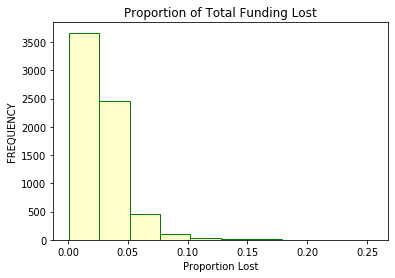

In [55]:
fiscal_data_5['proportion cut'].plot.hist(title='Proportion of Total Funding Lost', colormap='YlOrRd', edgecolor = 'g',)
plt.xlabel('Proportion Lost')
plt.ylabel('FREQUENCY')
plt.savefig("sol1.png")
plt.show()

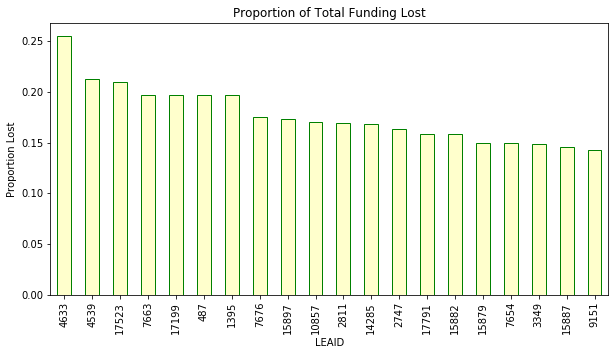

In [56]:
fiscal_data_5[['proportion cut', 'NAME']].sort_values('proportion cut', ascending=False)['proportion cut'][:20].plot.bar(title='Proportion of Total Funding Lost', colormap='YlOrRd', edgecolor = 'g', figsize=(10, 5))
plt.xlabel('LEAID')
plt.ylabel('Proportion Lost')
plt.savefig("sol12.png")
plt.show()

In [20]:
fiscal_data_5.sort_values('proportion cut', ascending=False)[:25]

,LEAID,NAME,proportion cut
4633,1800133,Ripley-Ohio-Dearborn Sp Ed Coop,0.254965
4539,1800010,Greater Randolph Interlocal Coop,0.213168
17523,5099925,Lamoille North Supervisory Union,0.210179
7663,2680850,Muskegon Area ISD,0.197157
17199,5000007,Barre Supervisory Union,0.197044
487,0400419,Gila County Regional School District,0.197033
1395,0601362,Central Valley Support Services JPA,0.196522
7676,2680995,Wayne RESA,0.174999
15897,4800192,ACCELERATED INTERMEDIATE ACADEMY,0.17284
10857,3500158,WALATOWA CHARTER HIGH,0.169947


### Solution 2

In [21]:
demo_data =pd.read_csv('ccd_lea_052_1516_w_1a_011717.csv',low_memory=False)
demo_data = demo_data.loc[demo_data['TOTAL'] > 0]

In [22]:
def leading_zero(x):
    if len(x) < 7:
        x = '0'+x
    return x

demo_data['LEAID'] = demo_data['LEAID'].apply(lambda x: leading_zero(str(x)))

In [23]:
demo_df = pd.DataFrame({
    'TOTAL' : demo_data['TOTAL'],
    'LEAID' : demo_data['LEAID'],
    'AM': (demo_data['AM']/demo_data['TOTAL']).to_list(),
    'AS': (demo_data['AS']/demo_data['TOTAL']).to_list(),
    'BL': (demo_data['BL']/demo_data['TOTAL']).to_list(),
    'HI':(demo_data['HI']/demo_data['TOTAL']).to_list(),
    'HP':(demo_data['HP']/demo_data['TOTAL']).to_list(),
    'TR':(demo_data['TR']/demo_data['TOTAL']).to_list(),
    'WH':(demo_data['WH']/demo_data['TOTAL']).to_list()})

In [24]:
fiscal_demo = pd.merge(fiscal_data[['LEAID']], demo_df, how='left', on='LEAID')

In [25]:
fiscal_demo.head()

,LEAID,TOTAL,AM,AS,BL,HI,HP,TR,WH
0,0100005,5214.0,0.002685,0.003260,0.029152,0.439010,0.000767,0.022823,0.502301
1,0100006,5635.0,0.004614,0.003017,0.008873,0.205856,0.000355,0.008696,0.768589
2,0100007,13910.0,0.000719,0.066930,0.254565,0.072466,0.001006,0.019770,0.584543
3,0100008,10011.0,0.006193,0.086105,0.203976,0.043852,0.002697,0.039257,0.617920
4,0100011,1905.0,0.001050,0.006824,0.227297,0.126509,0.002625,0.033071,0.602625


In [26]:
def budget_cut(x):
    if x in list(fiscal_data_5['LEAID']):
        return True
    else:
        return False
    
fiscal_demo['budget_cut'] = fiscal_demo['LEAID'].apply(lambda x: budget_cut(x))

In [27]:
fiscal_demo

,LEAID,TOTAL,AM,AS,BL,HI,HP,TR,WH,budget_cut
0,0100005,5214.0,0.002685,0.003260,0.029152,0.439010,0.000767,0.022823,0.502301,True
1,0100006,5635.0,0.004614,0.003017,0.008873,0.205856,0.000355,0.008696,0.768589,False
2,0100007,13910.0,0.000719,0.066930,0.254565,0.072466,0.001006,0.019770,0.584543,True
3,0100008,10011.0,0.006193,0.086105,0.203976,0.043852,0.002697,0.039257,0.617920,True
4,0100011,1905.0,0.001050,0.006824,0.227297,0.126509,0.002625,0.033071,0.602625,False
...,...,...,...,...,...,...,...,...,...,...
16950,5605762,2710.0,0.005166,0.001476,0.004797,0.162731,0.005535,0.023985,0.796310,True
16951,5605820,106.0,0.009434,0.000000,0.009434,0.000000,0.000000,0.009434,0.971698,False
16952,5605830,2770.0,0.005776,0.014801,0.002527,0.314079,0.000000,0.015162,0.647653,False
16953,5606090,268.0,0.014925,0.000000,0.003731,0.044776,0.000000,0.018657,0.917910,False


In [28]:
melted_fiscal_demo = pd.melt(fiscal_demo, id_vars=['LEAID','budget_cut'], value_vars=['AM','AS','BL', 'HI', 'HP', 'WH','TR'])

In [29]:
melted_fiscal_demo.rename(columns={'value':'Proportion', 'variable':'Race'}, inplace=True)

In [30]:
melted_fiscal_demo = melted_fiscal_demo.loc[melted_fiscal_demo['Proportion'] >= 0]

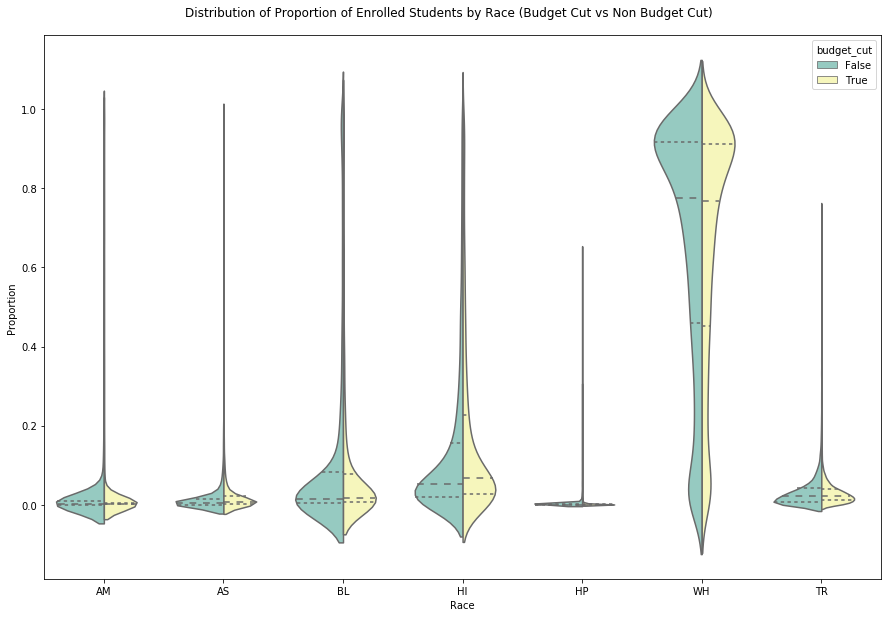

In [31]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x='Race', y= 'Proportion', hue='budget_cut',
                    data = melted_fiscal_demo, palette= 'Set3', split=True,
                    scale = 'count', inner = "quartile",
                    scale_hue = True, bw = 0.2)
plt.suptitle('Distribution of Proportion of Enrolled Students by Race (Budget Cut vs Non Budget Cut)', y = 0.92)
plt.savefig('q2.png')
plt.show()

### Solution 3

In [32]:
disable_df = pd.read_csv('ccd_lea_002089_1516_w_1a_011717.csv')

In [33]:
disable_df['LEAID'] = disable_df['LEAID'].apply(lambda x: leading_zero(str(x)))

In [34]:
merged_disable = pd.merge(disable_df, fiscal_demo, how='right', on='LEAID')

In [35]:
merged_disable['Proportion'] = merged_disable['SPECED']/ merged_disable['TOTAL']

In [36]:
merged_disable['budget_cut'] = merged_disable['LEAID'].apply(lambda x: budget_cut(x))

In [37]:
merged_disable.dropna(inplace=True)

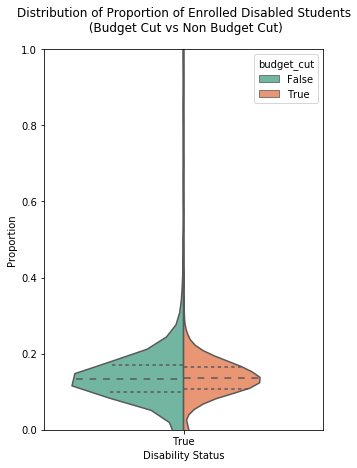

In [38]:
merged_disable['Disability Status'] = ['True']* len(merged_disable)

plt.figure(figsize=(5,7))
ax = sns.violinplot(x ='Disability Status', y='Proportion', hue='budget_cut',
                    data = merged_disable, palette= 'Set2', split=True,
                    scale = 'count', inner = "quartile",
                    scale_hue = False, bw = .2)

plt.title('Distribution of Proportion of Enrolled Disabled Students\n (Budget Cut vs Non Budget Cut)', y= 1.03)
plt.savefig('q3.png')
plt.ylim(0.0, 1.0)
plt.show()